In [1]:
# Importing libraries for Task 1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Importing libraries for Task 2
from sklearn.model_selection import train_test_split
import numpy as np

# Importing libraries for Task 3
# Using tabulate library to create beautiful table
from tabulate import tabulate

# Importing libraries for Task 4
from sklearn.metrics import r2_score
import scipy.spatial.distance as distance
from sklearn.neighbors import KNeighborsRegressor

### Task 1: Load and Data Analysis
1. Load the Boston Housing dataset from OpenML (ID=531).
2. Data Profiling:
  - Correlation HeatMap
  - Pairplot of Selected Features
  - Feature vs. Target (Scatter Plots)
  - Distribution of Target (MEDV)
  ***************************************

In [2]:
# Loading Boston Housing Dataset which have ID = 531 from OpenML, keeping as_frame=True which return the dataset as a panadas DataFrame instead NumPy array
bostonOpenMl = fetch_openml(data_id=531, as_frame=True)

# It converts fetched data into DataFrame
df = bostonOpenMl.frame

# It shows First few rows of the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


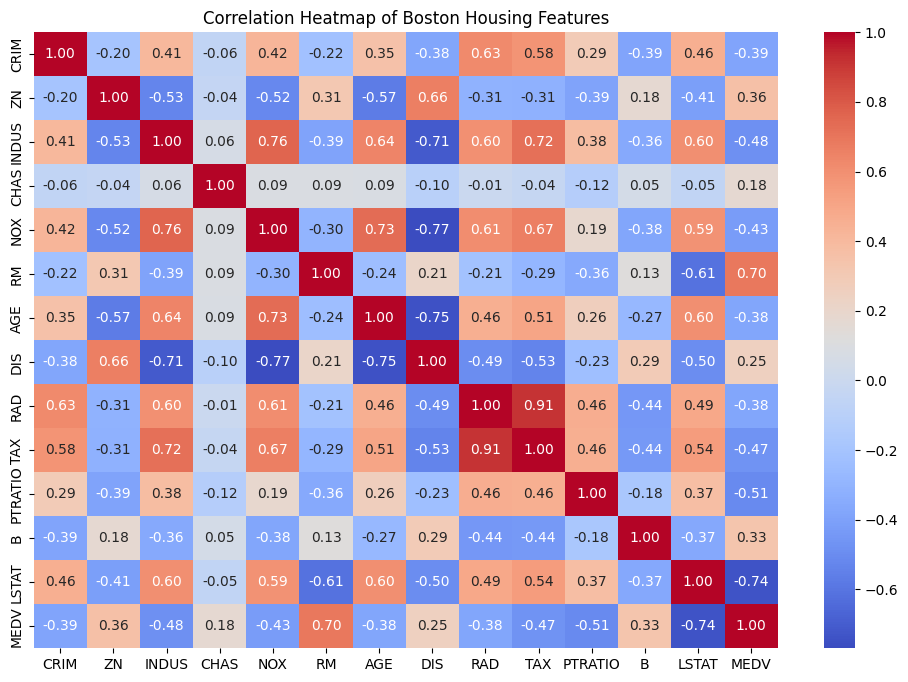

In [3]:
# It creates a correlation matrix, which shows how each features related to other features
corrMat = df.corr()

# It set size of the heat map figure with 12 inches is width and 8 inches is height
plt.figure(figsize=(12, 8))

# It create the heatmap with correlation values which takes input
# corr - correlation matrix, annot=True means it annotate each cell with numeric value
# cmap='coolwarm' it is a color palette for heatmap. Blue - negative correlation, Red - Positive Correlation, White - near Zero Correlation
# fmt=".2f" - it format the text inside each cell, formating floating point number with 2 decimal places.
sns.heatmap(corrMat, annot=True, cmap='coolwarm', fmt=".2f")

# Title for the Heatmap
plt.title("Correlation Heatmap of Boston Housing Features")

# It display the Heatmap
plt.show()

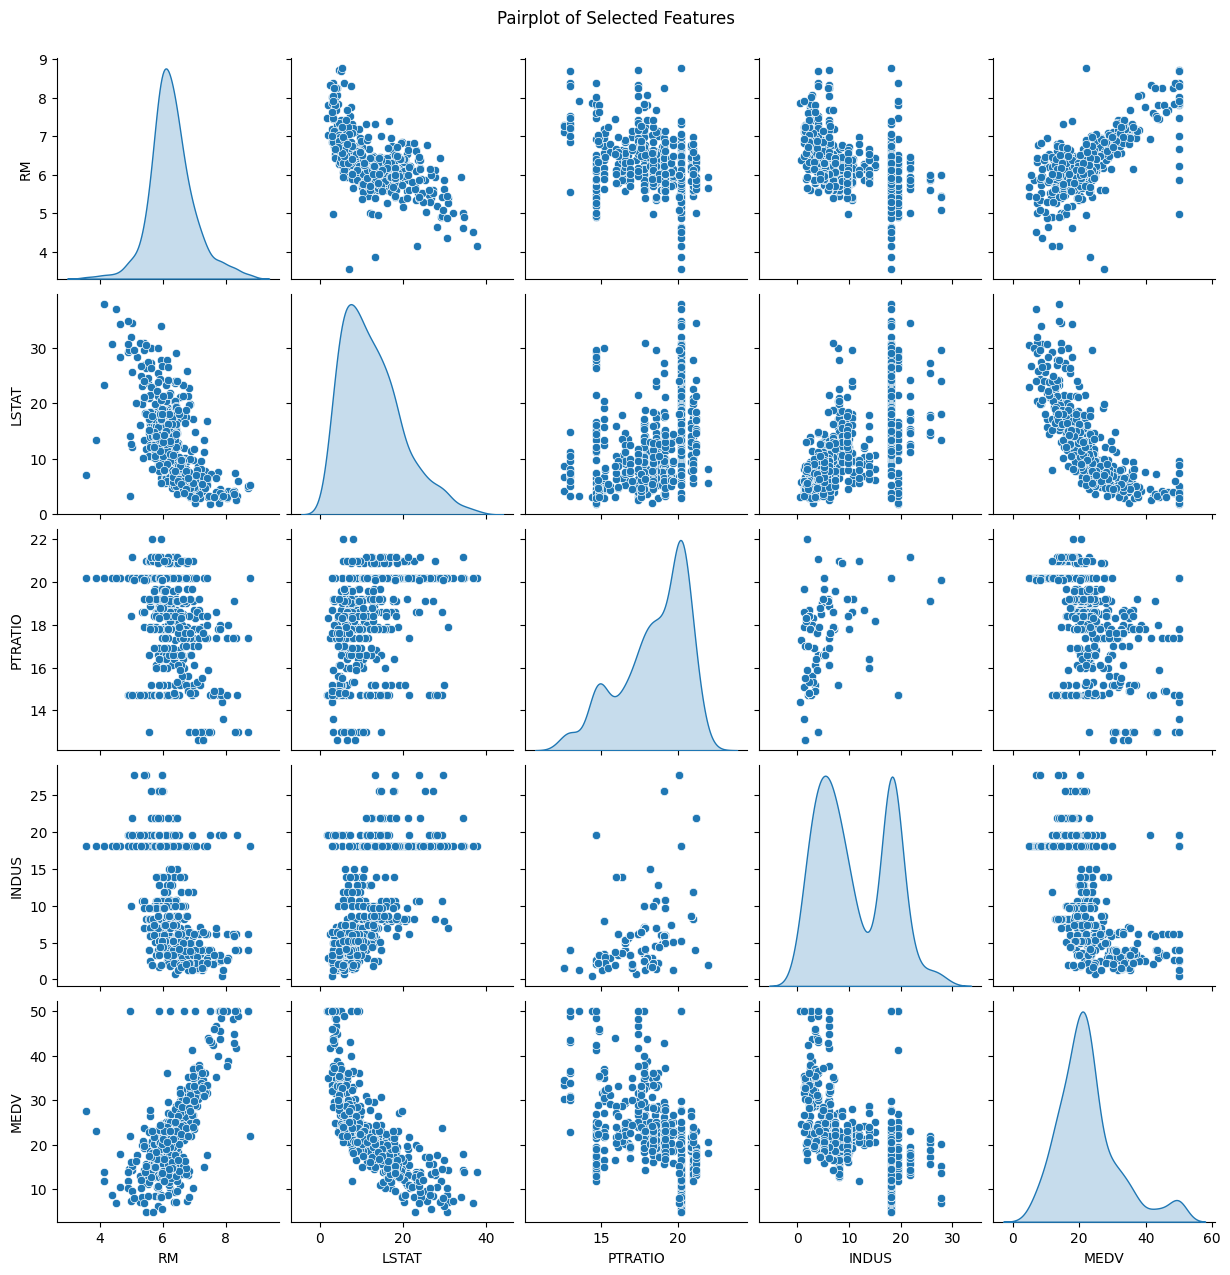

In [4]:
# selected top features based on coorelation
selectedFeatures = ['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'MEDV']

# It creates Kernel Density Estimate (It smooths curve which represents values of distribution) (KDEs) on the diagonal, and pairwise scatterplots
sns.pairplot(df[selectedFeatures], diag_kind="kde")

# Title of the whole plot
plt.suptitle("Pairplot of Selected Features", y=1.02)

# Displays plot
plt.show()

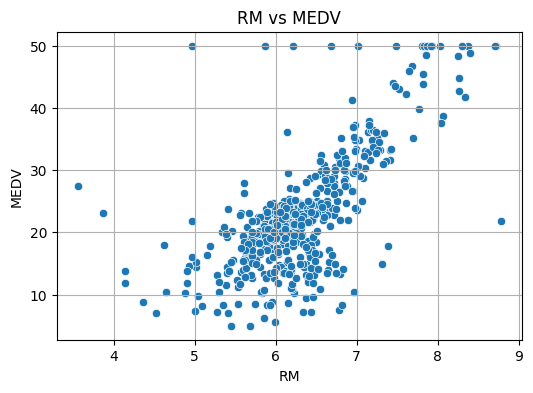

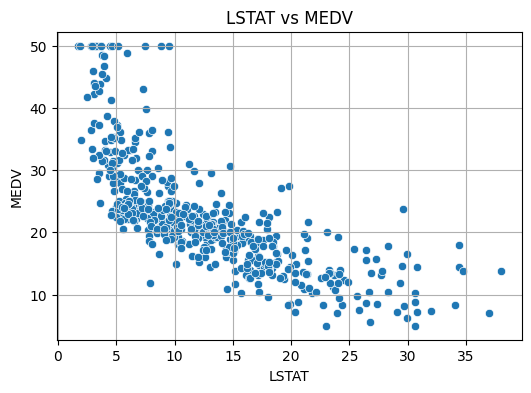

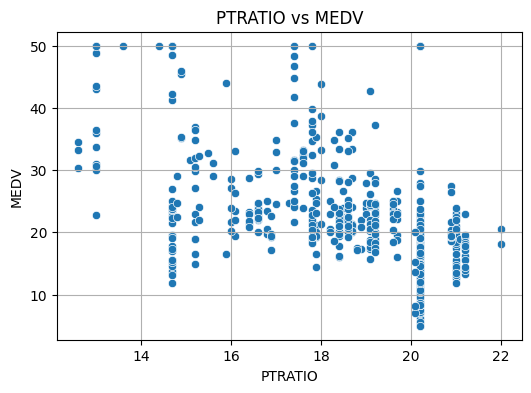

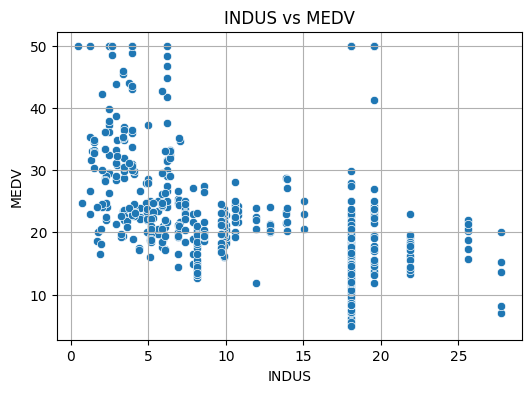

In [5]:
# for each selected features, plot scatter vs. MEDV
for feature in selectedFeatures[:-1]:

    # size of the distribution plot with wiidth 6 and height 4
    plt.figure(figsize=(6, 4))

    # x - axis : features, y -axis : MEDV
    sns.scatterplot(x=df[feature], y=df['MEDV'])

    # Title and axis labels
    plt.title(f'{feature} vs MEDV')
    plt.xlabel(feature)
    plt.ylabel('MEDV')

    # It shows gridlines
    plt.grid(True)

    # Displays plot
    plt.show()

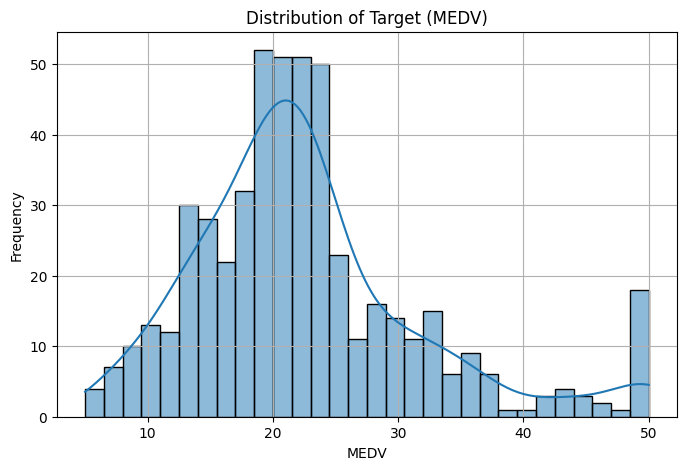

In [6]:
# size of the distribution plot with wiidth 8 and height 5
plt.figure(figsize=(8, 5))

# It Plots Histogram + KDE (smoothed curve) for MEDV (target)
sns.histplot(df['MEDV'], kde=True, bins=30)

# Title and axis labels
plt.title("Distribution of Target (MEDV)")
plt.xlabel("MEDV")
plt.ylabel("Frequency")

# shows grid
plt.grid(True)

# Displays Plot
plt.show()

### Task 2: Scaling and Splitting the data
1. Scale the features so that all are in the same range (e.g., using Min-Max scaling).
2. Split the dataset into training and testing sets, with 80% training and 20% testing.
*****************************************

In [7]:
# seperating the feature variables (X) and the target varoable (y)
X = df.drop(columns=['MEDV'])
y = df['MEDV']

In [8]:
# this is custom min-max Scaler
class CustomMinMaxScaler:
    def __init__(self):
        self.min = None
        self.max = None

    def fit(self, X):
        # Computing min and max for each column as feature wise
        self.min = np.min(X, axis=0)
        self.max = np.max(X, axis=0)

    def transform(self, X):
        return (X - self.min) / (self.max - self.min + 1e-8)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

# Using custom scaler and filtering numeric columns only
X_numeric = X.select_dtypes(include=[np.number])

# Use of custom scaler on numeric features
# each feature is in range [0, 1]
scaler = CustomMinMaxScaler()
X_scaled = scaler.fit_transform(X_numeric.values)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_numeric.columns, index=X.index)


In [9]:
X_scaled

array([[0.00000000e+00, 1.80000000e-01, 6.78152492e-02, ...,
        2.87234042e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737253e-01, 6.34657836e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617020e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617020e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617020e-01, 1.00000000e+00, 1.69701987e-01]])

In [10]:
X_scaled_df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.314815,0.577505,0.641607,0.269203,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.172840,0.547998,0.782698,0.348962,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.172840,0.694386,0.599382,0.348962,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.150206,0.658555,0.441813,0.448545,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.150206,0.687105,0.528321,0.448545,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.386831,0.580954,0.681771,0.122671,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.386831,0.490324,0.760041,0.105293,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.386831,0.654340,0.907312,0.094381,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.386831,0.619467,0.889804,0.114514,0.164122,0.893617,0.991301,0.131071


In [11]:
# splitting the scaled data into training and testing sets in 80% and 20% split respectively
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [12]:
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (404, 11)
Testing features shape: (102, 11)
Training target shape: (404,)
Testing target shape: (102,)


### Task 3: Implement KNN Regressor from Scratch
1. Implement a KNN regressor from scratch- Simple Average
  
2. Support the following distance metrics:

  2.1. Euclidean distance

  2.2. Manhattan distance

  2.3. Cosine distance

3. For different values of k (e.g., 3, 5, 7, 9, 11), predict test set targets and compute R² scores for each combination of k and distance metric.
4. Create a table summarizing the R² scores for each (k, distance metric) pa \
*****************************************

In [13]:
# custom function to calculate mean which calculated as suum of all values divided by length (count of those values)
def customMean(values):
    return sum(values) / len(values)

# custom function to calculate sum of all all values in a list or array
def customSum(values):
    total = 0
    # loop for each values in list
    for v in values:
      total += v
    return total

# I have created Custom Function to calculate R² Score
def CustomR2Sscore(y_true, y_pred):
    # It calculates total sum of squares means how much is variation is in the data
    ssTotal = customSum((y_true - customMean(y_true)) ** 2)

    # It calculates Residual sum of squares means how much error the model made
    ssResidual = customSum((y_true - y_pred) ** 2)

    # R² Score: 1 - (error explained by model / total variation)
    return 1 - (ssResidual / ssTotal)

# Defining range of k values and distance types to calculate
k_list = [3, 5, 7, 9, 11]
distanceMetrics = ['euclidean', 'manhattan', 'cosine']

In [14]:
# Custom implementation of K-Nearest Neighbors Regressor from scratch
class CustomKNNRegressor:
    def __init__(self, k, metric):
        # Seting number of neighbors (k) to use
        self.k = k
        # Seting the distance metric (metric) to use
        self.metric = metric

    def fit(self, X, y):
        # Storing training data
        # storing X_train
        self.X_train = X
        # storing X_train
        self.y_train = y
        return self

    # Euclidean distance betwenn two vectors x1 and x2
    def euclideanDistance(self, x1, x2):
        total = 0
        # for each corresponding element in the two vectors
        for a, b in zip(x1, x2):
          # first addthe squared diffetence
            total += (a - b) ** 2
        # Returns the square root of results containing the sum of squared differences
        return total ** 0.5

    # Manhattan distance betwenn two vectors x1 and x2
    def manhattanDistance(self, x1, x2):
        total = 0
        # for each corresponding element in the two vectors
        for a, b in zip(x1, x2):
            # adding absolute difference of corresponding elements
            total += abs(a - b)
        return total

    # Cosine distance betwenn two vectors x1 and x2
    def cosineDistance(self, x1, x2):
        # First calculate dot product of the two vectors
        dotProduct = customSum([a * b for a, b in zip(x1, x2)])

        # computing magnitude which is norm for each vector
        norm_x1 = customSum([a * a for a in x1]) ** 0.5
        norm_x2 = customSum([b * b for b in x2]) ** 0.5

        # If any vector have zero mafnitude it return max distance (1.0)
        if norm_x1 == 0 or norm_x2 == 0:
            return 1.0

        # Calcute cosine similarity
        cosineSimilarity = dotProduct / (norm_x1 * norm_x2)

        # convert similarity to distance then returnes
        return 1 - cosineSimilarity

    # Predict method for the KNN regressor
    def predict(self, X):

        # It hold predictions for each test smaples
        predictions = []

        # Loop thoruogh each sample in test data
        for sample in X:

            # It stores distance from current sample to all training samples
            distances = []

            # Loop throuch each taining sample to calculate distances
            for train_sample in self.X_train:

                # uses the given distance metric
                if self.metric == 'euclidean':
                    dist = self.euclideanDistance(sample, train_sample)
                elif self.metric == 'manhattan':
                    dist = self.manhattanDistance(sample, train_sample)
                elif self.metric == 'cosine':
                    dist = self.cosineDistance(sample, train_sample)

                else:
                    # It raises error if unsupported metric is given
                    raise ValueError("Unsupported distance metric")
                # It stores values caculated in each metric as a dictionary
                distances.append(dist)

            # It calulates indices of k nearest neighbors
            topKIndices = np.argsort(distances)[:self.k]

            # Get corresponding labels (y values) of k nearest neighbors
            # It first chech of training target values (y_train) are stored as Pandas series
            if isinstance(self.y_train, pd.Series):
              # If yes it uses .ilocto retrieve elemts by integer position
              # It used to avoids issues with label based indexing in Pandas
                nearestOutputs = self.y_train.iloc[topKIndices]
            else:
              # If No then it may be used NumPy array, (standard indexing)
              # it directly selects the k nearest using NumPy style indexing
                nearestOutputs = self.y_train[topKIndices]

            # Calculating average value of nearest outputs using custom mean
            avgPrediction = customMean(nearestOutputs)
            # It then append the computed average prediction to the list of final predictions
            predictions.append(avgPrediction)


        # Return predictions as a NumPy array
        return np.array(predictions)

evaluationResults = []

# It Runs model for every combination of k and distance metric as given
for k in k_list:
    for metric in distanceMetrics:
      # It creates as instance for the custom KNN regressor with current k and distance metric
        model = CustomKNNRegressor(k=k, metric=metric)

        # It fits model using the training data for eg. (learn X_train and y_tain)
        model.fit(X_train, y_train)

        # It predicts values for the test data
        preds = model.predict(X_test)

        # It computes R**2 score using a custom funtion which evaluate prediction accuracy
        r2 = CustomR2Sscore(y_test, preds)

        # Stores all results in a list for later analysis/ comparision
        evaluationResults.append({'k': k, 'metric': metric, 'R2': r2})

# Converting the results which is dictionaries into Pandas DataFrame
results_df = pd.DataFrame(evaluationResults)

# Creates pivot table
# rows with different values of k
# cols with different distance metrics
# cells contains correspondin R**2 scores
r2TableCustomKNN = results_df.pivot(index='k', columns='metric', values='R2')

# prints heading for the R**2 comparision output
print("\nCustom KNN Regression R² Comparison:\n")

# fancy_grid gives box layout, floatfmt=".4f" formats R**2 values to 4 decimal places
print(tabulate(r2TableCustomKNN, headers='keys', tablefmt='fancy_grid', floatfmt=".4f"))


Custom KNN Regression R² Comparison:

╒═════╤══════════╤═════════════╤═════════════╕
│   k │   cosine │   euclidean │   manhattan │
╞═════╪══════════╪═════════════╪═════════════╡
│   3 │   0.8242 │      0.8062 │      0.8475 │
├─────┼──────────┼─────────────┼─────────────┤
│   5 │   0.8187 │      0.8202 │      0.8178 │
├─────┼──────────┼─────────────┼─────────────┤
│   7 │   0.8057 │      0.8117 │      0.8246 │
├─────┼──────────┼─────────────┼─────────────┤
│   9 │   0.7607 │      0.7676 │      0.8026 │
├─────┼──────────┼─────────────┼─────────────┤
│  11 │   0.7335 │      0.7350 │      0.7824 │
╘═════╧══════════╧═════════════╧═════════════╛


### Task 4: Compare with scikit-learn Simple KNN
1. Identify the (k, distance metric) combination that gave the best R² score from your custom implementation.
2. Use scikit-learn’s KNeighborsRegressor with algorithm='brute', weights='uniform', and the same (k, distance metric) to train and test on the dataset.
3. Compare the R² score of the scikit-learn model with your custom implementation for that best configuration
*****************************************

In [15]:
# Get best performing configuration from results of simple custom KNN
top_config = results_df.loc[results_df['R2'].idxmax()]

# Get best (k) performing configuration from results of simple custom KNN
best_k = top_config['k']

# Get best (metric) performing configuration from results of simple custom KNN
best_metric = top_config['metric']

# Train scikit-learn's KNN Regressor using the given settings
# n_neighbors: number of nearest neighbors to use from the same from custom KNN
# metric: distance metric to use same from custom KNN
# algorithm: 'brute' forces distance calculation
# weights: 'uniform' means all neighbors should equally weighted in prediction
sk_model = KNeighborsRegressor(n_neighbors=best_k, metric=best_metric, algorithm='brute', weights='uniform')

# Fit the model to the training data (learn from X_train and y_train)
sk_model.fit(X_train, y_train)

# Predict target values for the test set
sk_preds = sk_model.predict(X_test)

# calculate R**2 score for evaluation
# R² = 1 means perfect prediction, closer to 0 or negative means worse fit
sk_r2 = r2_score(y_test, sk_preds)

# Show performance comparison
print(f"\nTop Custom KNN: (k={best_k}, metric={best_metric}) => Custom R² = {top_config['R2']:.4f}, Scikit-learn R² = {sk_r2:.4f}")



Top Custom KNN: (k=3, metric=manhattan) => Custom R² = 0.8475, Scikit-learn R² = 0.8475


### Task 5: Implement Weighted KNN Regressor from Scratch
1. Implement a weighted average KNN regressor from scratch, where weights are the inverse of the distance to neighbors.
  
2. Support the following distance metrics:

  2.1. Euclidean distance

  2.2. Manhattan distance

  2.3. Cosine distance

3. For different values of k (e.g., 3, 5, 7, 9, 11), predict test set targets and compute R² scores for each combination of k and distance metric.
4. Create a table summarizing the R² scores for each (k, distance metric) pair.
*****************************************

In [16]:
# Custom implementation of Weighted K-Nearest Neighbors Regressor from scratch
class CustomWeightedKNNRegressor:
    def __init__(self, k, metric):
        # Seting number of neighbors (k) to use
        self.k = k
        # Seting the distance metric (metric) to use
        self.metric = metric

    def fit(self, X, y):
        # Storing training data
        # storing X_train
        self.X_train = X
        # storing X_train
        self.y_train = y
        return self

    # Euclidean distance betwenn two vectors x1 and x2
    def euclideanDistance(self, x1, x2):
        total = 0
        # for each corresponding element in the two vectors
        for a, b in zip(x1, x2):
          # first addthe squared diffetence
            total += (a - b) ** 2
        # Returns the square root of results containing the sum of squared differences
        return total ** 0.5

    # Manhattan distance betwenn two vectors x1 and x2
    def manhattanDistance(self, x1, x2):
        total = 0
        # for each corresponding element in the two vectors
        for a, b in zip(x1, x2):
            # adding absolute difference of corresponding elements
            total += abs(a - b)
        return total

    # Cosine distance betwenn two vectors x1 and x2
    def cosineDistance(self, x1, x2):
        # First calculate dot product of the two vectors
        dotProduct = customSum([a * b for a, b in zip(x1, x2)])

        # computing magnitude which is norm for each vector
        norm_x1 = customSum([a * a for a in x1]) ** 0.5
        norm_x2 = customSum([b * b for b in x2]) ** 0.5

        # If any vector have zero mafnitude it return max distance (1.0)
        if norm_x1 == 0 or norm_x2 == 0:
            return 1.0

        # Calcute cosine similarity
        cosineSimilarity = dotProduct / (norm_x1 * norm_x2)

        # convert similarity to distance then returnes
        return 1 - cosineSimilarity

    def predict(self, X):

        # It hold predictions for each test smaples
        predictions = []

        # Loop thoruogh each sample in test data
        for sample in X:

            # It stores distance from current sample to all training samples
            distances = []

            # Loop throuch each taining sample to calculate distances
            for train_sample in self.X_train:

                # uses the given distance metric
                if self.metric == 'euclidean':
                    dist = self.euclideanDistance(sample, train_sample)
                elif self.metric == 'manhattan':
                    dist = self.manhattanDistance(sample, train_sample)
                elif self.metric == 'cosine':
                    dist = self.cosineDistance(sample, train_sample)

                else:
                    # It raises error if unsupported metric is given
                    raise ValueError("Unsupported distance metric")
                # It stores values caculated in each metric as a dictionary
                distances.append(dist)

            # It calulates indices of k nearest neighbors
            topKIndices = np.argsort(distances)[:self.k]

            # Get corresponding labels (y values) of k nearest neighbors
            # It first chech of training target values (y_train) are stored as Pandas series
            if isinstance(self.y_train, pd.Series):
                # If yes it uses .ilocto retrieve elemts by integer position
                # It used to avoids issues with label based indexing in Pandas
                nearestValues = self.y_train.iloc[topKIndices]
            else:
                # If No then it may be used NumPy array, (standard indexing)
                # it directly selects the k nearest using NumPy style indexing
                nearestValues = self.y_train[topKIndices]

            # it extracy distances corresponding to the top-k nearest neighbours.
            nearest_distances = np.array([distances[i] for i in topKIndices])

            # calculate inveerse distance weights
            # if distance is 0 added small epsilon (1e - 10) to avoid division by 0
            weights = 1 / (nearest_distances + 1e-10)

            # compute weighted average prediction
            # first multiply each neighbors values by its weights
            # then divide toal weighted sum by sum of weights
            pred = customSum(nearestValues * weights) / customSum(weights)

            # Add predicted values to the list of predictions
            predictions.append(pred)

        # after predicting all test samples, returns predictoion as NumPy array
        return np.array(predictions)

# Evaluate weighted KNN
weighted_knn_results = []
for k in k_list:
    for metric in distanceMetrics:

       # It creates as instance for the custom KNN regressor with current k and distance metric
        knn = CustomWeightedKNNRegressor(k=k, metric=metric)

        # It fits model using the training data for eg. (learn X_train and y_tain)
        knn.fit(X_train, y_train)

        # It predicts values for the test data
        y_pred = knn.predict(X_test)

        # It computes R**2 score using a custom funtion which evaluate prediction accuracy
        r2 = CustomR2Sscore(y_test, y_pred)

        # Stores all results in a list for later analysis/ comparision
        weighted_knn_results.append({'k': k, 'metric': metric, 'R2': r2})

# Converting the results which is dictionaries into Pandas DataFrame
weightedKnnDf = pd.DataFrame(weighted_knn_results)

# Creates pivot table
# rows with different values of k
# cols with different distance metrics
# cells contains correspondin R**2 scores
weightedR2Table = weightedKnnDf.pivot(index='k', columns='metric', values='R2')

print("\nCustom Weighted KNN Regression R² Comparison:\n")
print(tabulate(weightedR2Table, headers='keys', tablefmt='fancy_grid', floatfmt=".4f"))



Custom Weighted KNN Regression R² Comparison:

╒═════╤══════════╤═════════════╤═════════════╕
│   k │   cosine │   euclidean │   manhattan │
╞═════╪══════════╪═════════════╪═════════════╡
│   3 │   0.8484 │      0.8244 │      0.8567 │
├─────┼──────────┼─────────────┼─────────────┤
│   5 │   0.8586 │      0.8441 │      0.8391 │
├─────┼──────────┼─────────────┼─────────────┤
│   7 │   0.8587 │      0.8369 │      0.8484 │
├─────┼──────────┼─────────────┼─────────────┤
│   9 │   0.8362 │      0.8070 │      0.8319 │
├─────┼──────────┼─────────────┼─────────────┤
│  11 │   0.8223 │      0.7823 │      0.8164 │
╘═════╧══════════╧═════════════╧═════════════╛


### Task 6: Compare with scikit-learn Weighted KNN
1. Identify the best (k, distance metric) combination from your weighted KNN results.

2. Use scikit-learn’s KNeighborsRegressor with algorithm='brute' and weights='distance' for the same (k, distance metric).
*****************************************

In [17]:
# Get best performing configuration from results of weighted KNN regressor
best_metric = top_config['metric']
# Get best (k) performing configuration from results of weighted KNN regressor
best_weighted = weightedKnnDf.loc[weightedKnnDf['R2'].idxmax()]
# Get best (metric) performing configuration from results
best_k_w, best_metric_w = best_weighted['k'], best_weighted['metric']

# Train scikit-learn's KNN Weighted Regressor using the given settings
sk_knn_w = KNeighborsRegressor(n_neighbors=best_k_w, metric=best_metric_w, algorithm='brute', weights='distance')

# Fit the model to the training data (learn from X_train and y_train)
sk_knn_w.fit(X_train, y_train)

# Predict target values for the test set
y_pred_sk_w = sk_knn_w.predict(X_test)

# calculate R**2 score for evaluation
# R² = 1 means perfect prediction, closer to 0 or negative means worse fit
sk_r2_w = r2_score(y_test, y_pred_sk_w)

# Show performance comparison
print(f"\nBest Weighted KNN (k={best_k_w}, {best_metric_w}): Custom R²={best_weighted['R2']:.4f}, Scikit-learn R²={sk_r2_w:.4f}")


Best Weighted KNN (k=7, cosine): Custom R²=0.8587, Scikit-learn R²=0.8587


### Task 7: Reporting and Visualization
1. Plot the R² scores for both simple and weighted KNN from your implementation across different k and distance metrics (heatmap or line plots).

2. Plot corresponding R² scores from scikit-learn for the same parameters.

3. Compare the R² scores of scikit-learn weighted KNN with your custom weighted KNN for the best combination.

4. Plotting the Scatter Plots of the actual and predicted datapoints
*****************************************

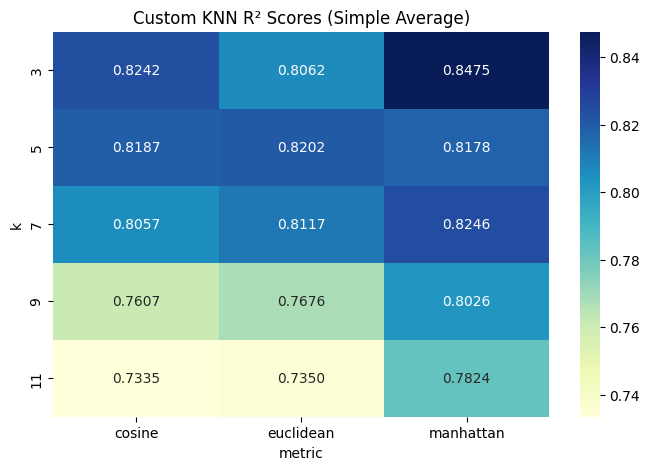

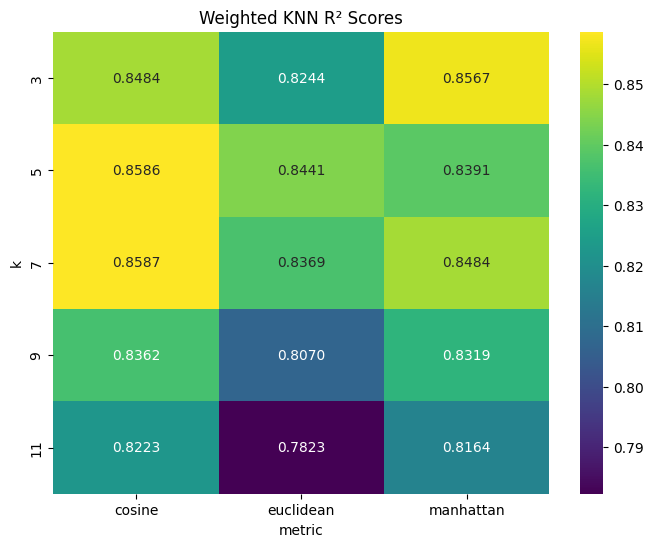

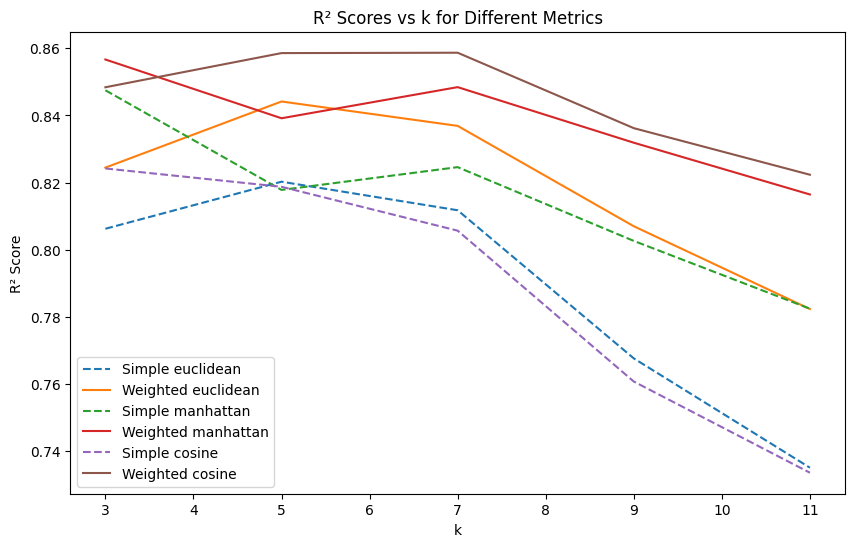

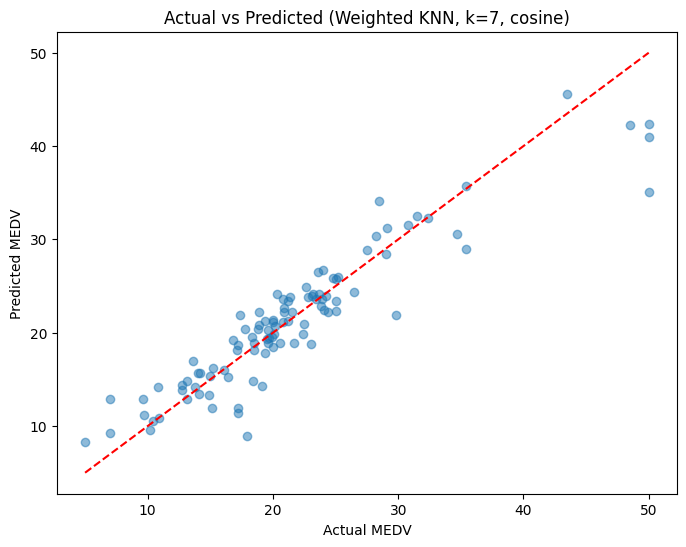


Comparison:
Custom Weighted KNN R² = 0.8587
Scikit-learn Weighted KNN R² = 0.8587


In [18]:
# Create figure of size 8 x 5 inches
plt.figure(figsize=(8, 5))

# Ploting Heatmap of R² scores from custom simple KNN
# annot=True it added R**2 values in heatmap cells
# cmap it defines color theme
# fmt=".4f" it formats nubers to 4 decimal places
sns.heatmap(r2TableCustomKNN, annot=True, cmap='YlGnBu', fmt=".4f")

# add title to plot
plt.title("Custom KNN R² Scores (Simple Average)")

# Display plot
plt.show()

# *******************************

# Create figure of size 8 x 5 inches
plt.figure(figsize=(8, 6))

# Ploting Heatmap of R² scores from custom Weighted KNN
sns.heatmap(weightedR2Table, annot=True, cmap='viridis', fmt=".4f")

# add title to plot
plt.title('Weighted KNN R² Scores')

# Display plot
plt.show()

# *******************************

# Create figure of size 10 x 6 inches
plt.figure(figsize=(10, 6))

# for each given distance metric
for metric in distanceMetrics:

    # get R² scores for simple KNN for current metric
    simpleScores = results_df[results_df['metric'] == metric]['R2']

    # Get R² scores for weighted KNN for the same metric
    # The weightedR2Table is already pivoted with metrics as columns
    weightedScores = weightedR2Table[metric]

    # Plot simple KNN scores with dashed line
    plt.plot(k_list, simpleScores, label=f'Simple {metric}', linestyle='--')

    # Plot weighted KNN scores with solid line
    plt.plot(k_list, weightedScores, label=f'Weighted {metric}')

# Label the axes and add title
plt.xlabel('k')
plt.ylabel('R² Score')
plt.title('R² Scores vs k for Different Metrics')
plt.legend()

# display ploy
plt.show()
# **************************************

# Create figure of size 8 x 6 inches
plt.figure(figsize=(8, 6))

# plot scatter plot of true vs predicted MEDV values
plt.scatter(y_test, y_pred_sk_w, alpha=0.5)

# Plot a red dashed diagonal line which represent perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# Label axes and title
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title(f'Actual vs Predicted (Weighted KNN, k={best_k_w}, {best_metric_w})')

# display plot
plt.show()

print(f"\nComparison:\nCustom Weighted KNN R² = {best_weighted['R2']:.4f}")
print(f"Scikit-learn Weighted KNN R² = {sk_r2_w:.4f}")

### Task 8: Summarize your findings:


- Which (k, distance metric) performed best?

- How does your implementation compare with scikit-learn?

- Discuss any observations regarding distance metrics or weighting.
*****************************************

In [19]:
print("\nSummary of Findings:")

print(f"Best Simple KNN: k={best_k}, metric={best_metric}, R²={top_config['R2']:.4f}")

print(f"Best Weighted KNN: k={best_k_w}, metric={best_metric_w}, R²={best_weighted['R2']:.4f}")

print("Comparison with scikit-learn:")

print(f"  Simple KNN: Custom R²={top_config['R2']:.4f}, Scikit-learn R²={sk_r2:.4f}")

print(f"  Weighted KNN: Custom R²={best_weighted['R2']:.4f}, Scikit-learn R²={sk_r2_w:.4f}")

print("\nObservations:")

print("- Weighted KNN perforning better than simple KNN because of distance based weighting.")

print("- Euclidean and Manhattan metrics performing better than cosine in this dataset in both simple and weighted KNN.")

print("- Custom implementations are closely matching scikit-learn's original results which indicates correctness for both simple and weighted KNN.")

print("- k values which are optimal can vary, but k=3 and k=7 giving strong performance for simple KNN and weighted KNN respectively.")


Summary of Findings:
Best Simple KNN: k=3, metric=manhattan, R²=0.8475
Best Weighted KNN: k=7, metric=cosine, R²=0.8587
Comparison with scikit-learn:
  Simple KNN: Custom R²=0.8475, Scikit-learn R²=0.8475
  Weighted KNN: Custom R²=0.8587, Scikit-learn R²=0.8587

Observations:
- Weighted KNN perforning better than simple KNN because of distance based weighting.
- Euclidean and Manhattan metrics performing better than cosine in this dataset in both simple and weighted KNN.
- Custom implementations are closely matching scikit-learn's original results which indicates correctness for both simple and weighted KNN.
- k values which are optimal can vary, but k=3 and k=7 giving strong performance for simple KNN and weighted KNN respectively.
